<a href="https://colab.research.google.com/github/ChristopherFiel/Data-Visualization/blob/main/Space_Weather_Oct_2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import all the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager

In [ ]:
# Import Gdrive to collab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the usable font
font_manager.get_font_names()

['DejaVu Sans Display',
 'DejaVu Sans',
 'cmtt10',
 'Humor Sans',
 'Liberation Mono',
 'cmex10',
 'cmr10',
 'STIXSizeFiveSym',
 'cmss10',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'DejaVu Serif',
 'STIXSizeTwoSym',
 'cmsy10',
 'DejaVu Serif Display',
 'Liberation Sans Narrow',
 'cmb10',
 'STIXGeneral',
 'STIXSizeThreeSym',
 'Liberation Serif',
 'Liberation Sans',
 'STIXSizeOneSym',
 'STIXSizeFourSym',
 'cmmi10']

In [ ]:
# Read the kp file
kp = pd.read_excel('/content/drive/MyDrive/AST 20 cleaned data/2015/2015-kp-index.xlsx')
kp.head()

,DOY,kp,Month,Day
0,302.000,0,10,29
1,302.125,0,10,29
2,302.250,1,10,29
3,302.375,1,10,29
4,302.500,1,10,29


In [ ]:
# Read the dst file
dst = pd.read_excel('/content/drive/MyDrive/AST 20 cleaned data/2015/2015-dst-index.xlsx')
dst.head()

,DST,DOY
0,0,302.000000
1,2,302.038462
2,4,302.076923
3,5,302.115385
4,8,302.153846


In [ ]:
# Read the silent days and SWEPAM data
oct = pd.read_excel('/content/drive/MyDrive/AST 20 cleaned data/2015/Oct-2015.xlsx')
oct.head()

,DOY,VEq/vTEC,292,293,294,295,296,297,298,299,...,313,314,Average,Difference,Bz,Prt_den,He_ratio,SW_spd,Prt_Temp,Rel Diff
0,302.000000,28.57,43.01,38.03,41.66,37.98,35.88,36.26,34.27,34.80,...,32.07,30.90,34.322222,-5.752222,3.4343,3.9863,0.0399,310.9758,20856.0,-16.759469
1,302.003479,29.10,43.71,38.53,42.43,38.80,36.64,36.87,34.93,35.56,...,33.15,31.61,35.003889,-5.903889,3.5133,3.8077,0.0434,308.9018,20992.0,-16.866380
2,302.006958,29.63,44.41,39.03,43.19,39.62,37.39,37.49,35.59,36.31,...,34.23,32.33,35.690556,-6.060556,3.6978,3.7651,0.0428,310.0092,19802.0,-16.980838
3,302.010406,30.16,45.11,39.53,43.96,40.44,38.14,38.10,36.26,37.06,...,35.31,33.04,36.375556,-6.215556,3.5018,4.0666,0.0556,309.5046,23258.0,-17.087177
4,302.013885,30.69,45.80,40.03,44.72,41.26,38.90,38.72,36.92,37.82,...,36.39,33.75,37.062222,-6.372222,3.5271,3.7083,0.0581,308.6170,24239.0,-17.193309


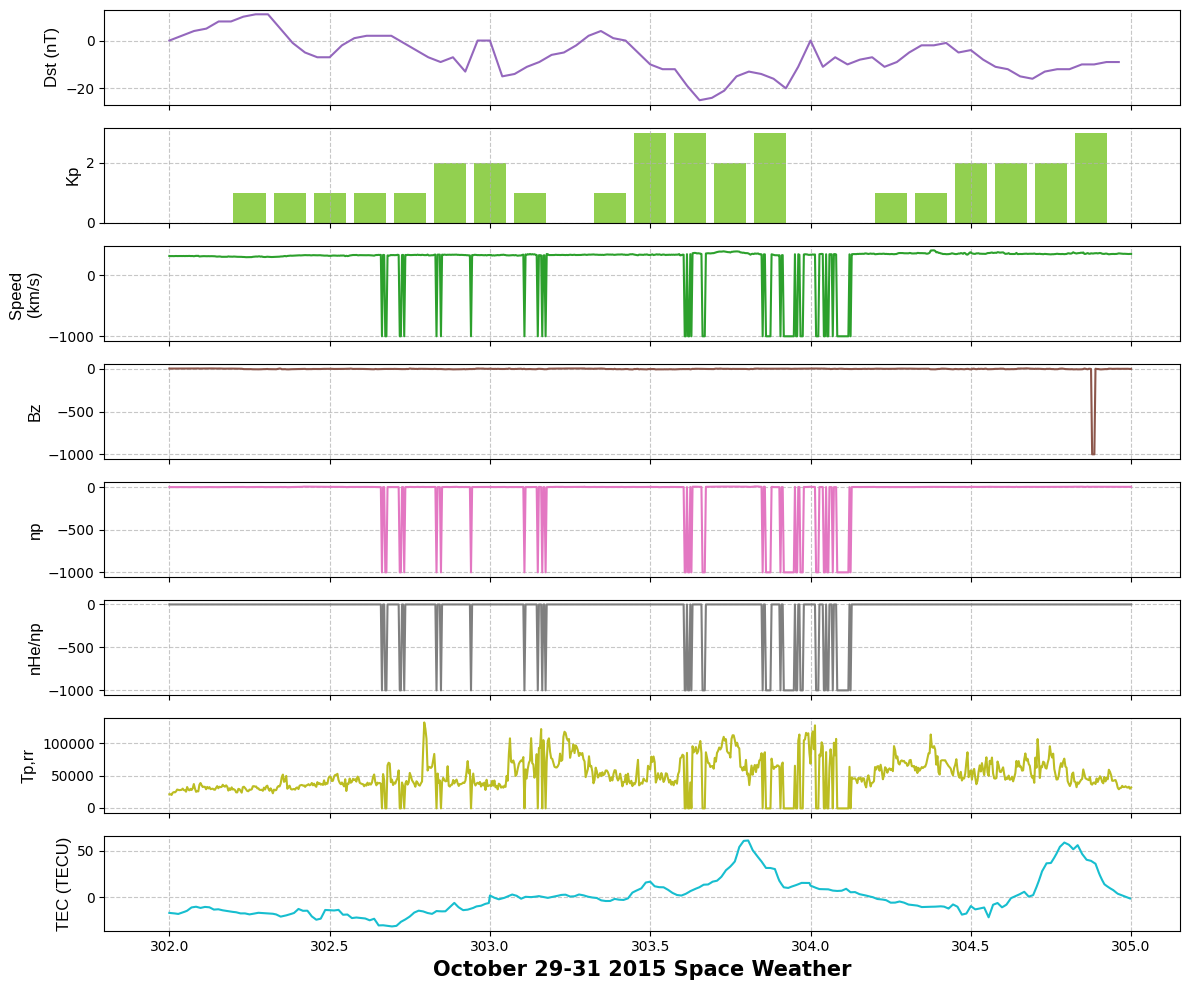

In [ ]:
# Create subplots
fig, axes = plt.subplots(8, sharex=True, figsize=(12, 10))

# Define color based on Kp
color = []
for val in kp['kp']:
    if val <= 3:
        color.append('#92D050')
    elif val >= 6:
        color.append('#ff0000')
    else:
        color.append('#f6eb14')

# Plotting data with
axes[0].plot(dst['DOY'], dst['DST'], color='#9467bd', linewidth=1.5)
axes[1].bar(kp['DOY'], kp['kp'], width=0.1, color=color,)
axes[2].plot(oct['DOY'], oct['SW_spd'], color='#2ca02c', linewidth=1.5)
axes[3].plot(oct['DOY'], oct['Bz'], color='#8c564b', linewidth=1.5)
axes[4].plot(oct['DOY'], oct['Prt_den'], color='#e377c2', linewidth=1.5)
axes[5].plot(oct['DOY'], oct['He_ratio'], color='#7f7f7f', linewidth=1.5)
axes[6].plot(oct['DOY'], oct['Prt_Temp'], color='#bcbd22', linewidth=1.5)
axes[7].plot(oct['DOY'], oct['Rel Diff'], oct['Average'] color='#17becf', linewidth=1.5)

# Set labels and titles
label_font = {'fontsize': 12, 'fontname': 'Liberation Sans'}
axes[0].set_ylabel('Dst (nT)', **label_font)
axes[1].set_ylabel('Kp', **label_font)
axes[2].set_ylabel('Speed \n(km/s)', **label_font)
axes[3].set_ylabel('Bz', **label_font)
axes[4].set_ylabel('np', **label_font)
axes[5].set_ylabel('nHe/np', **label_font)
axes[6].set_ylabel('Tp,rr', **label_font)
axes[7].set_ylabel('TEC (TECU)', **label_font)
axes[7].set_xlabel('October 29-31 2015 Space Weather', fontsize=15, fontweight='bold')

# Add grid and titles for clarity
for ax in axes:
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.label_outer()

# Save the plot as a PNG file
plt.savefig('Space Weather Oct 2015.png', format='png', dpi=300, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()